In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle

### Chatbot Intents

In [2]:
data = {"intents": [
    {"tag": "greeting",
     "patterns": ["Hi", "Hey", "Is anyone there?", "Hello", "Hay"],
     "responses": ["Hello", "Hi", "Hi there"]
    },
    {"tag": "goodbye",
     "patterns": ["Bye", "See you later", "Goodbye"],
     "responses": ["See you later", "Have a nice day", "Bye! Come back again"]
    },
    {"tag": "thanks",
     "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks for the help"],
     "responses": ["Happy to help!", "Any time!", "My pleasure", "You're most welcome!"]
    },
    {"tag": "about",
     "patterns": ["Who are you?", "What are you?", "Who you are?" ],
     "responses": ["I.m Joana, your bot assistant", "I'm Joana, an Artificial Intelligent bot"]
    },
    {"tag": "name",
    "patterns": ["what is your name", "what should I call you", "whats your name?"],
    "responses": ["You can call me Joana.", "I'm Joana!", "Just call me as Joana"]
    },
    {"tag": "help",
    "patterns": ["Could you help me?", "give me a hand please", "Can you help?", "What can you do for me?", "I need a support", "I need a help", "support me please"],
    "responses": ["Tell me how can assist you", "Tell me your problem to assist you", "Yes Sure, How can I support you"]
    },
    {"tag": "createaccount",
    "patterns": ["I need to create a new account", "how to open a new account", "I want to create an account", "can you create an account for me", "how to open a new account"],
    "responses": ["You can just easily create a new account from our web site", "Just go to our web site and follow the guidelines to create a new account"]
    },
    {"tag": "complaint",
    "patterns": ["have a complaint", "I want to raise a complaint", "there is a complaint about a service"],
    "responses": ["Please provide us your complaint in order to assist you", "Please mention your complaint, we will reach you and sorry for any inconvenience caused"]
    }
]
}

In [3]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for patterns in intent['patterns']:
        training_sentences.append(patterns)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

print(f"\n Number of variables: {len(labels)}")


 Number of variables: 8


In [4]:
#encoding labels
l_encoder = LabelEncoder()
l_encoder.fit(training_labels)
training_labels = l_encoder.transform(training_labels)

In [12]:
vocab_size = 1000
word_embedding = 16
max_len = 20
oov_token = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(word_index)

#fitting to sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequence = pad_sequences(sequences, truncating='post', maxlen = max_len)
print("\n{}".format(padded_sequence))

{'<OOV>': 1, 'you': 2, 'a': 3, 'i': 4, 'me': 5, 'to': 6, 'account': 7, 'help': 8, 'what': 9, 'is': 10, 'for': 11, 'are': 12, 'can': 13, 'need': 14, 'create': 15, 'new': 16, 'complaint': 17, 'there': 18, 'thanks': 19, 'who': 20, 'your': 21, 'name': 22, 'please': 23, 'support': 24, 'how': 25, 'open': 26, 'want': 27, 'an': 28, 'hi': 29, 'hey': 30, 'anyone': 31, 'hello': 32, 'hay': 33, 'bye': 34, 'see': 35, 'later': 36, 'goodbye': 37, 'thank': 38, "that's": 39, 'helpful': 40, 'the': 41, 'should': 42, 'call': 43, 'whats': 44, 'could': 45, 'give': 46, 'hand': 47, 'do': 48, 'have': 49, 'raise': 50, 'about': 51, 'service': 52}

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 29]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 31 18]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 32]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 33]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [17]:
#Building Neural Network
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, word_embedding, input_length = max_len))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(len(labels), activation = 'softmax'))

model.summary()


model.compile(loss='sparse_categorical_crossentropy',optimizer = keras.optimizers.Adam(), metrics=['acc'])
train_model = model.fit(padded_sequence, np.array(training_labels),epochs = 500 )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 1s 20ms/step - loss: 2.0780 - acc: 0.2121
Epoch 2/500
2/2 [======

2/2 [==============================] - 0s 6ms/step - loss: 2.0022 - acc: 0.2121
Epoch 79/500
2/2 [==============================] - 0s 3ms/step - loss: 2.0013 - acc: 0.2121
Epoch 80/500
2/2 [==============================] - 0s 6ms/step - loss: 2.0001 - acc: 0.2121
Epoch 81/500
2/2 [==============================] - 0s 5ms/step - loss: 1.9992 - acc: 0.2121
Epoch 82/500
2/2 [==============================] - 0s 2ms/step - loss: 1.9979 - acc: 0.2121
Epoch 83/500
2/2 [==============================] - 0s 4ms/step - loss: 1.9965 - acc: 0.2121
Epoch 84/500
2/2 [==============================] - 0s 4ms/step - loss: 1.9949 - acc: 0.2121
Epoch 85/500
2/2 [==============================] - 0s 4ms/step - loss: 1.9930 - acc: 0.2121
Epoch 86/500
2/2 [==============================] - 0s 3ms/step - loss: 1.9909 - acc: 0.2121
Epoch 87/500
2/2 [==============================] - 0s 3ms/step - loss: 1.9887 - acc: 0.2121
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 1.9870 - ac

2/2 [==============================] - 0s 3ms/step - loss: 1.7776 - acc: 0.3636
Epoch 166/500
2/2 [==============================] - 0s 5ms/step - loss: 1.7732 - acc: 0.3636
Epoch 167/500
2/2 [==============================] - 0s 3ms/step - loss: 1.7673 - acc: 0.3636
Epoch 168/500
2/2 [==============================] - 0s 4ms/step - loss: 1.7616 - acc: 0.3636
Epoch 169/500
2/2 [==============================] - 0s 3ms/step - loss: 1.7566 - acc: 0.3636
Epoch 170/500
2/2 [==============================] - 0s 803us/step - loss: 1.7523 - acc: 0.3636
Epoch 171/500
2/2 [==============================] - 0s 3ms/step - loss: 1.7470 - acc: 0.3333
Epoch 172/500
2/2 [==============================] - 0s 4ms/step - loss: 1.7421 - acc: 0.3333
Epoch 173/500
2/2 [==============================] - 0s 3ms/step - loss: 1.7360 - acc: 0.3333
Epoch 174/500
2/2 [==============================] - 0s 3ms/step - loss: 1.7298 - acc: 0.3333
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss:

2/2 [==============================] - 0s 1ms/step - loss: 1.2418 - acc: 0.4545
Epoch 253/500
2/2 [==============================] - 0s 2ms/step - loss: 1.2345 - acc: 0.4545
Epoch 254/500
2/2 [==============================] - 0s 3ms/step - loss: 1.2295 - acc: 0.4545
Epoch 255/500
2/2 [==============================] - 0s 4ms/step - loss: 1.2254 - acc: 0.4545
Epoch 256/500
2/2 [==============================] - 0s 5ms/step - loss: 1.2222 - acc: 0.4545
Epoch 257/500
2/2 [==============================] - 0s 2ms/step - loss: 1.2166 - acc: 0.4848
Epoch 258/500
2/2 [==============================] - 0s 2ms/step - loss: 1.2092 - acc: 0.4848
Epoch 259/500
2/2 [==============================] - 0s 3ms/step - loss: 1.2013 - acc: 0.4848
Epoch 260/500
2/2 [==============================] - 0s 3ms/step - loss: 1.1948 - acc: 0.4848
Epoch 261/500
2/2 [==============================] - 0s 3ms/step - loss: 1.1877 - acc: 0.4848
Epoch 262/500
2/2 [==============================] - 0s 2ms/step - loss: 1

2/2 [==============================] - 0s 5ms/step - loss: 0.8190 - acc: 0.8182
Epoch 339/500
2/2 [==============================] - 0s 6ms/step - loss: 0.8151 - acc: 0.8182
Epoch 340/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8126 - acc: 0.8182
Epoch 341/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8114 - acc: 0.8182
Epoch 342/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8102 - acc: 0.8182
Epoch 343/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8073 - acc: 0.7879
Epoch 344/500
2/2 [==============================] - 0s 3ms/step - loss: 0.8032 - acc: 0.7879
Epoch 345/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7994 - acc: 0.8182
Epoch 346/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7969 - acc: 0.8182
Epoch 347/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7931 - acc: 0.8182
Epoch 348/500
2/2 [==============================] - 0s 2ms/step - loss: 0

2/2 [==============================] - 0s 4ms/step - loss: 0.5607 - acc: 0.9091
Epoch 426/500
2/2 [==============================] - 0s 4ms/step - loss: 0.5595 - acc: 0.9091
Epoch 427/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5574 - acc: 0.9091
Epoch 428/500
2/2 [==============================] - 0s 499us/step - loss: 0.5549 - acc: 0.9091
Epoch 429/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5523 - acc: 0.9091
Epoch 430/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5500 - acc: 0.9091
Epoch 431/500
2/2 [==============================] - 0s 4ms/step - loss: 0.5478 - acc: 0.9091
Epoch 432/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5457 - acc: 0.9091
Epoch 433/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5439 - acc: 0.9091
Epoch 434/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5430 - acc: 0.9091
Epoch 435/500
2/2 [==============================] - 0s 2ms/step - loss:

In [19]:
data = pd.DataFrame(train_model.history)

In [26]:
def visualization(dataframe):
    epocs = [i for i in range(1,501)]
    plt.figure(figsize = (7,7))
    plt.plot(epocs,dataframe['loss'])
    plt.xlabel('epocs')
    plt.ylabel('Loss')
    plt.title('Behavior of Loss')
    plt.show()
    
    print("\n")
    
    plt.figure(figsize = (7,7))
    plt.plot(epocs,dataframe['acc'], c='red')
    plt.xlabel('epocs')
    plt.ylabel('Accuracy')
    plt.title('Behavior of Accuracy')
    plt.show()
    
    

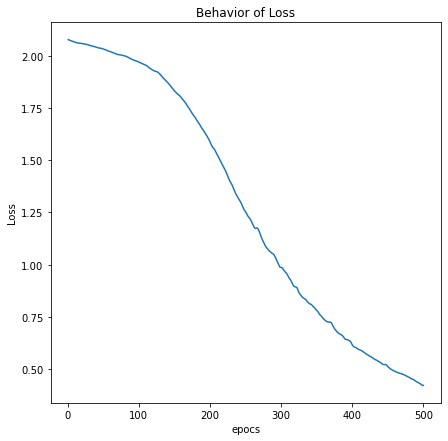

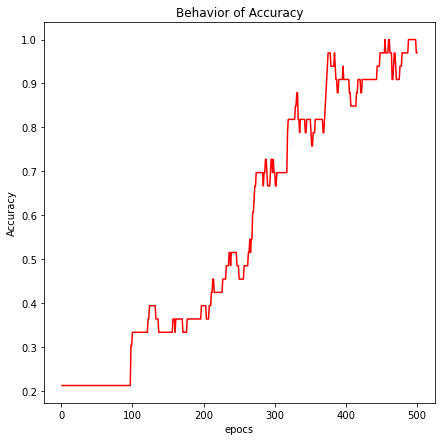

In [27]:
visualization(data)

In [28]:
#model saving
model.save('chat_model')

INFO:tensorflow:Assets written to: chat_model\assets


In [30]:
#save the fitted tokenizer
with open('tokenizer.pikle', 'wb') as handle:
    pickle.dump(tokenizer, handle, pickle.HIGHEST_PROTOCOL)

In [32]:
with open('label_encoder.pikle', 'wb') as lbl:
    pickle.dump(l_encoder, lbl, pickle.HIGHEST_PROTOCOL)